#Titanic

In [1]:
# mac475의 ipython 표준 style을 적용함
from IPython.core.display import HTML
styles = open("../styles/custom.css", "r").read()
HTML( styles )

##1. 개    요

##Description
In this challenge, we ask you to complete the analysis of
**what sorts of people were likely to survive.**
In particular, we ask you to **apply the tools of machine learning** **to predict which passengers survived the tragedy.**
- 즉, 어떤 종류의 승객이 살아남는지를 분석해야 한다.
- M.L을 적용해야 한다.
- 어떤 승객이 생존할 지 예측해야 한다.

##Evaluation

제시되는 dataset은 두 종류로 split되어있으며
- training set : 생존여부를 같이 제공한다. 모델링을 위해 사용한다.
- test set : prediction을 생성해야 한다.
이다.
test set에 대해서 생존여부를 예측해야 한다. (0 : 사망, 1 : 생존)
정확히 예측한 %가 점수로 부여된다.

##Submission Instructions

You should **submit a csv file** with exactly **418 entries plus a header row.**

This <font color='red'>**must have exactly 2 columns: PassengerId (which can be sorted in any order), and Survived</font>

which contains your binary predictions: 1 for survived, 0 for did not.**

- csv를 제출한다.
- csv에는 418개와 header row가 있어야 한다.
- 2개 column만 존재해야 한다. PassengerId, Survived (1 : 생존, 0 : 사망)
- 추가적 column 사용은 금지한다.

참고를 위해, gendermodel.csv를 참고한다.

##Competition Rules

###Submission Limits
**You may submit a maximum of 10 entries per day. (10회/일 가능)**

**You may select up to 5 final submissions for judging. (최종적으로 5개까지 선택가능함)**

###Competition Timeline
Start Date: 9/28/2012 9:13:33 PM UTC

Merger Deadline: None

First Submission Deadline: None

End Date: 12/31/2015 11:59:00 PM UTC

This is a fun competition aimed at helping you get started with machine learning.  While the Titanic dataset is publically
available on the internet, looking up the answers defeats the entire purpose.  So seriously, don't do that.

##dataset내의 변수관련 참고자료는 다음과 같다

|VARIABLE|DESCRIPTIONS
|:-|:-|:-:
|survival|Survival (0 = No; 1 = Yes)
|pclass|Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
|name|Name
|sex|Sex
|age|Age
|sibsp|Number of Siblings/Spouses Aboard
|parch|Number of Parents/Children Aboard
|ticket|Ticket Number
|fare|Passenger Fare
|cabin|Cabin (객실 정보, 객실 번호)
|embarked|Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

Parent:   Mother or Father of Passenger Aboard Titanic

Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

##2. Train data 확보/ Cleansing

In [2]:
# -*- coding: utf-8-*-
import pandas as pd
import numpy as np

# data를 확보한다.
df = pd.read_csv( './dataset/train.csv' )    # data를 읽어들인다.
# df.head()    # 대략적 내용을 파악한다.

In [3]:
# df.shape    # dataframe의 형태를 파악한다.

In [4]:
df.count()    # 각 feature들의 data 현황을 파악한다.

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

대부분의 feature들은 문제없어 보이나, Age는 일부 누락, Cabin은 누락이 많아 보인다.

In [5]:
df_age_isNaN = df[ df[ 'Age' ].isnull() ]    # Age가 NaN인 data를 별도로 확인한다. isnull()은 numeric의 경우 NaN을 찾을 수 있다.
df_age_is0 = df[ df[ 'Age' ] == 0 ]    # 혹시나, Age == 0를 찾아보니 없다.
print 'Age의 누락개수 : ', df_age_isNaN[ 'PassengerId' ].size
# df_age_isNaN.head()

Age의 누락개수 :  177


In [6]:
df_cabin_isNone = df[ df[ 'Cabin' ].isnull() ]    # Cabin이 None인 data를 별도로 확인한다.
print 'Cabin의 누락개수 : ', df_cabin_isNone[ 'PassengerId' ].size    # Cabin은 누락이 상당히 많다.
# df_cabin_isNone.head()

Cabin의 누락개수 :  687


In [7]:
# 분석에 필요없어 보이는 Name을 제거한다. → first name을 통해 가족들의 생존률이 고려가능하다고 판단
# df.drop( [ 'Name' ], axis = 1, inplace = True )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [8]:
df.count()    # 다시한번, dataset을 살펴본다.

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Embarked도 2건의 누락이 있다

In [9]:
df_embarked_isNone = df[ df[ 'Embarked' ].isnull() ]    # Embarked가 None인 것들
df_embarked_isNone

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN


두 승객 모두 생존했고, 1등급이고, 여성이며, Fare = 80이다

In [10]:
df[ 'Embarked' ].value_counts()

S    644
C    168
Q     77
dtype: int64

Embarked는 다음과 같은 의미로 승객의 승선지를 제공한다.

Port of Embarkation (S = Southampton, C = Cherbourg, Q = Queenstown)

Titanic의 경로에 대한 참고정보 ['http://www.gma.org/space1/titanic.html']

In [11]:
# Ticket 번호를 근거로, 승선지 Embarked를 추정한다. 일정부분 가정이 개입됨.
df[ [ 'Ticket', 'Fare', 'Cabin', 'Embarked' ] ][ df[ 'Ticket' ] >= '113510' ].sort( columns = 'Ticket' ).head( 10 )

,Ticket,Fare,Cabin,Embarked
351,113510,35.00,C128,S
252,113514,26.55,C87,S
829,113572,80.00,B28,NaN
61,113572,80.00,B28,NaN
763,113760,120.00,B96 B98,S
802,113760,120.00,B96 B98,S
390,113760,120.00,B96 B98,S
435,113760,120.00,B96 B98,S
185,113767,50.00,A32,S
748,113773,53.10,D30,S


따라서, Embarked가 누락된 2개 승객은 B28 Cabin을 사용하였으며, 아마도 Southampton에서 승선했으리라고 판단가능하다.

Embarked 누락분 2개는 'S' 값을 부여하기로 한다.

In [12]:
# idx_list = df[ df[ 'Embarked' ].isnull() ].index.tolist()    # Embarked == null인 정보를 조회하여 index 확보
# for idx in idx_list :    # Embarked == null인 row에 대한 강제 setting
#     df.loc[ idx, 'Embarked' ] = 'S'
    
df[ 'Embarked' ].fillna( value = 'S', inplace = True )    # Embarked == null을 S로 대체

In [13]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
dtype: int64

Age에 여전히 누락이 많다.
Age를 살펴본다.

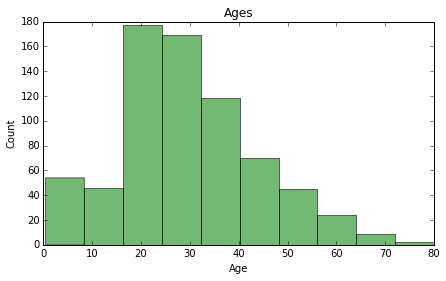

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

alpha_val = 0.55

sz_age = df[ df[ 'Age' ].notnull() ][ 'Age' ]    # Age만 별도 추출
    
fig_age = plt.figure( figsize = (7,4) )    # fig size 정의
ax_age = plt.subplot2grid( (1,1), (0,0) )    # 표현 data
plt.hist( x = sz_age, normed = False, facecolor = 'green', alpha = alpha_val )    # hist 설정
plt.xlabel( 'Age' ); plt.ylabel( 'Count' ); plt.title( 'Ages' )

In [15]:
print '최연소 : ', sz_age.min(), '\n최고령 : ', sz_age.max(), '\n평균연령 : ', sz_age.mean(), '\n중간연령 : ', sz_age.median()

최연소 :  0.42 
최고령 :  80.0 
평균연령 :  29.6991176471 
중간연령 :  28.0


* 20대, 30대에 많이 편중되어 있다. 

Age == NaN인 missed dataset들에 대해,
1. 제외

2. 임의의 값 (mean, median 등) 부여

하고 분석할지 판단이 필요하다.

정확한 분석시도를 위해

##<font color='red'>Training dataset에서 크게 누락발생되는 Age를 복원하기 위한 다양한 Case가 존재</font>

In [16]:
df_test = pd.read_csv( './dataset/test.csv' )    # data를 읽어들인다.

# df_test[ df_test[ 'Age' ].isnull() ]
# Case 1 : Trainig/ Test를 누락값 보완으로 활용
# mean_age_sub0 = ( df[ 'Age' ][ df[ 'SibSp' ] == 0 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 0 ].mean() )/2.0
# mean_age_sub1 = ( df[ 'Age' ][ df[ 'SibSp' ] == 1 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 1 ].mean() )/2.0
# mean_age_sub2 = ( df[ 'Age' ][ df[ 'SibSp' ] == 2 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 2 ].mean() )/2.0
# mean_age_sub3 = ( df[ 'Age' ][ df[ 'SibSp' ] == 3 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 3 ].mean() )/2.0
# mean_age_sub4 = ( df[ 'Age' ][ df[ 'SibSp' ] == 4 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 4 ].mean() )/2.0
# mean_age_sub5 = ( df[ 'Age' ][ df[ 'SibSp' ] == 5 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 5 ].mean() )/2.0
mean_age_sub8 = df_test[ 'Age' ][ df_test[ 'SibSp' ] == 8 ].mean()

# Case 2 : Trainig를 누락값 보완으로 활용
mean_age_sub0 = df[ 'Age' ][ df[ 'SibSp' ] == 0 ].mean()
mean_age_sub1 = df[ 'Age' ][ df[ 'SibSp' ] == 1 ].mean()
mean_age_sub2 = df[ 'Age' ][ df[ 'SibSp' ] == 2 ].mean()
mean_age_sub3 = df[ 'Age' ][ df[ 'SibSp' ] == 3 ].mean()
mean_age_sub4 = df[ 'Age' ][ df[ 'SibSp' ] == 4 ].mean()
mean_age_sub5 = df[ 'Age' ][ df[ 'SibSp' ] == 5 ].mean()
mean_age_sub8 = df_test[ 'Age' ][ df_test[ 'SibSp' ] == 8 ].mean()

mean_age_sub0, mean_age_sub1, mean_age_sub2, mean_age_sub3, mean_age_sub4, mean_age_sub5, mean_age_sub8    # SibSp별 평균Age

(31.397558386411891,
 30.089726775956283,
 22.620000000000001,
 13.916666666666666,
 7.0555555555555554,
 10.199999999999999,
 14.5)

##Training data에서 Age를 보완하기 위해, SibSp Case별로 판단하여 복원

In [17]:
# Case 1
# df = df[ df[ 'Age' ].notnull() ]    # Age가 None이 아닌것들만 Filtering한다.
# Case 2
# df[ 'Age' ].fillna( value = df[ 'Age' ].mean(), inplace = True )    # 누락된 Age에 평균 mean값 부여
# Case 3
# df[ 'Age' ].fillna( value = df[ 'Age' ].median(), inplace = True )    # 누락된 Age에 평균 mean값 부여
# Case 4

print df.count()
idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 0 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub0

idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 1 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub1
    
idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 2 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub2
    
idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 3 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub3
    
idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 4 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub4
    
idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 5 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub5

idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 8 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub8
    
print df.count()
df[ df[ 'Age' ].isnull() ]

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
dtype: int64
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Cabin은 누락도 상당히 많고, 객실번호를 통해 모델링이 가능할 것으로 볼 수 없다.

분석가능하지 않다고 판단되므로 제외한다.

In [18]:
df.drop( labels = 'Cabin', axis = 1, inplace = True )
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

##3. Train data에 대한 탐색
###여기까지 기본적인 Cleansing 작업을 진행했다.
###이제, 각 Feature 측면을 확인해본다.

Survived Alive :  342 Died :  549 Alive % :  0.383838383838
Class 1st :  216 2nd :  184 3rd :  491
Embarked Cherbourg :  168 Queenstown :  77 Southampton :  646
Sex male :  577 female :  314


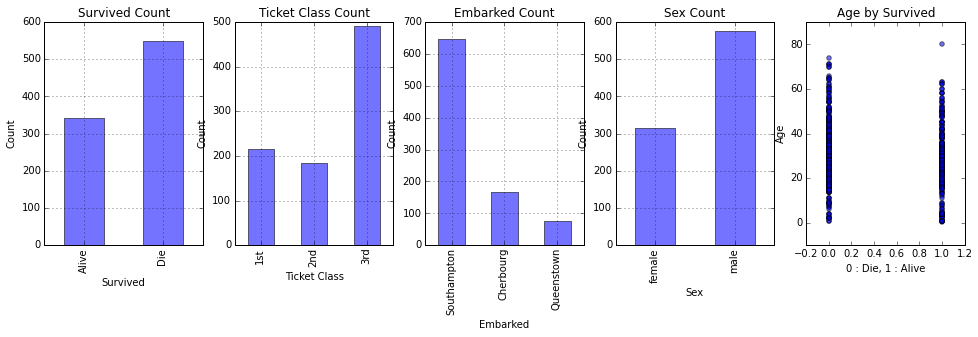

In [19]:
fig_survived_summary = plt.figure( figsize = (16.5,4) )    # fig size 정의

# Surveved의 기본확인
sz_survived_summary = df[ 'Survived' ].value_counts()    # Survived의 생존여부별로 groupby하여 결과수치를 확인한다.
sz_survived_summary_tweaked = sz_survived_summary.rename( index = { 0 : 'Die', 1 : 'Alive' } )    # index를 가시적으로 변경
ax_survived_summary = plt.subplot2grid( (1,5), (0,0) )    # 표현 data의 위치
sz_survived_summary_tweaked.sort_index().plot( kind = 'bar', ax = ax_survived_summary, alpha = alpha_val )
plt.xlabel( 'Survived' ); plt.ylabel( 'Count' ); plt.title( 'Survived Count' )
print 'Survived Alive : ', sz_survived_summary.ix[ 1 ], 'Died : ', sz_survived_summary.ix[ 0 ], 'Alive % : ', np.float( sz_survived_summary.ix[1] )/np.float( sz_survived_summary.sum() )

# P Class의 기본확인
sz_pclass_summary = df[ 'Pclass' ].value_counts()    # Pclass를 groupby하여 결과수치를 확인한다.
sz_pclass_summary.rename( index = { 1 : '1st', 2 : '2nd', 3 : '3rd' }, inplace = True )
ax_pclass_summary = plt.subplot2grid( (1,5), (0,1) )    # 표현 data의 위치
sz_pclass_summary.sort_index( ascending = True ).plot( kind = 'bar', ax = ax_pclass_summary, alpha = alpha_val )
plt.xlabel( 'Ticket Class' ); plt.ylabel( 'Count' ); plt.title( 'Ticket Class Count' )
print 'Class 1st : ', sz_pclass_summary.ix[ '1st' ], '2nd : ', sz_pclass_summary.ix[ '2nd' ], '3rd : ', sz_pclass_summary.ix[ '3rd' ]

# Embarked의 기본확인
sz_embarked_summary = df[ 'Embarked' ].value_counts()    # Embarked 정보별로 groupby하여 결과수치를 확인한다.
sz_embarked_summary.rename( index = { 'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton' }, inplace = True )
ax_embarked_summary = plt.subplot2grid( (1,5), (0,2) )    # 표현 data의 위치
sz_embarked_summary.plot( kind = 'bar', ax = ax_embarked_summary, alpha = alpha_val )
plt.xlabel( 'Embarked' ); plt.ylabel( 'Count' ); plt.title( 'Embarked Count' )
print 'Embarked Cherbourg : ', sz_embarked_summary.ix[ 'Cherbourg' ], 'Queenstown : ', sz_embarked_summary.ix[ 'Queenstown' ], 'Southampton : ', sz_embarked_summary.ix[ 'Southampton' ]

# Gender의 기본확인
sz_gender_summary = df[ 'Sex' ].value_counts()    # Sex 성별별로 groupby하여 결과수치를 확인한다.
ax_gender_summary = plt.subplot2grid( (1,5), (0,3) )    # 표현 data의 위치
sz_gender_summary.sort_index().plot( kind = 'bar', ax = ax_gender_summary, alpha = alpha_val )
plt.xlabel( 'Sex' ); plt.ylabel( 'Count' ); plt.title( 'Sex Count' )
print 'Sex male : ', sz_gender_summary.ix[ 'male' ], 'female : ', sz_gender_summary.ix[ 'female' ]

# 연령대의 기본확인
sz_survived = df[ 'Survived' ]
sz_survived_tweaked = sz_survived.replace( to_replace = { 0 : 'Die', 1 : 'Alive' } )
sz_age = df[ 'Age' ]
ax_survived_summary = plt.subplot2grid( (1,5), (0,4) )    # 표현 data의 위치
plt.scatter( x = sz_survived, y = sz_age, alpha = alpha_val )
plt.xlabel( '0 : Die, 1 : Alive' ); plt.ylabel( 'Age' ); plt.title( 'Age by Survived' )

### 요약하면,
1. 생존자 < 사망자
2. 1등석, 2등석 << 3등석
3. Southhampton 사람들이 많았고
4. 남자 > 여자
5. 65 ~ 대부분 사망

뭐, 일단은 이 정도로...

In [20]:
total_passengers = df[ 'PassengerId' ].size   # 전체 승객수
total_survived = df[ 'Survived' ].sum()    # 생존자수

df_male = df[ df[ 'Sex' ] == 'male' ]    # 남자
total_male = df_male[ 'PassengerId' ].size    # 남자의 수
df_male_survived = df_male[ df_male[ 'Survived' ] == 1 ]    # 남자 생존자
count_male_survived = df_male_survived[ 'PassengerId' ].size    # 남자 생존자수

df_female = df[ df[ 'Sex' ] == 'female' ]    # 여자
total_female = df_female[ 'PassengerId' ].size    # 여자의 수
df_female_survived = df_female[ df_female[ 'Survived' ] == 1 ]    # 여자 생존자
count_female_survived = df_female_survived[ 'PassengerId' ].size    # 여자 생존자수

In [21]:
# print '승객수 : ', total_passengers, ', 생존자수 : ', total_survived, ', 생존율 : ',\
#       np.float( total_survived )/ np.float( total_passengers), '\n'\
#       '남자 : ', total_male, ', 남자 생존자수 : ', count_male_survived, ', 남자 생존율 : ',\
#       np.float( count_male_survived )/np.float( total_male ),'\n'\
#       '여자 : ', total_female, ', 여자 생존자수 : ', count_female_survived, ', 여자 생존율 : ',\
#       np.float( count_female_survived )/np.float( total_female )

##KDE

KDE에 대한 참고 ('http://darkpgmr.tistory.com/147')

KDE를 통해 어떤 해석을 얻어야 할까?

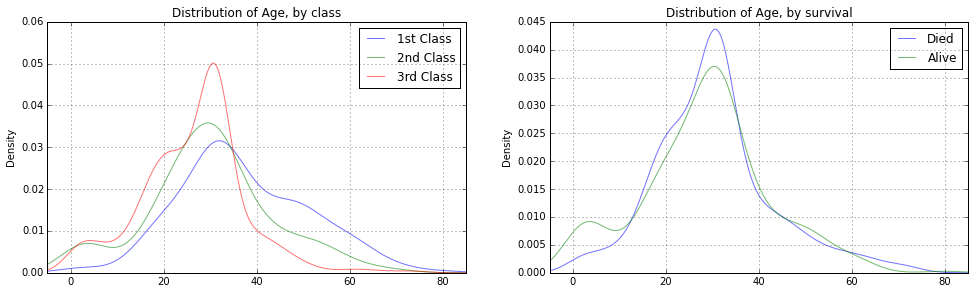

In [22]:
fig_x = plt.figure( figsize = (16.5,4.5) )    # 전체 figure를 선언

ax_x1 = plt.subplot2grid( (1,2), (0,0) )    # plot을 grid에 제공한다
sz_age1 = df[ 'Age' ]    # 나이정보 Series
sz_age1[ df[ 'Pclass' ] == 1 ].plot( kind = 'kde', xlim = ([-5,85]), alpha = alpha_val )    # 1등석인 승객들의 Age에 대한 KDE
sz_age1[ df[ 'Pclass' ] == 2 ].plot( kind = 'kde', xlim = ([-5,85]), alpha = alpha_val )    # 2등석인 승객들의 Age에 대한 KDE
sz_age1[ df[ 'Pclass' ] == 3 ].plot( kind = 'kde', xlim = ([-5,85]), alpha = alpha_val )    # 3등석인 승객들의 Age에 대한 KDE
plt.title( 'Distribution of Age, by class' )    # chart title을 생성한다
plt.legend( ('1st Class', '2nd Class', '3rd Class'), loc = 'best' )

ax_x2 = plt.subplot2grid( (1,2), (0,1) )    # plot을 grid에 제공한다
sz_age2 = df[ 'Age' ]    # 나이정보 Series
sz_age2[ df[ 'Survived' ] == 0 ].plot( kind = 'kde', xlim = ([-5,85]), alpha = alpha_val )    # 사망 승객들의 Age에 대한 KDE
sz_age2[ df[ 'Survived' ] == 1 ].plot( kind = 'kde', xlim = ([-5,85]), alpha = alpha_val )    # 생존 승객들의 Age에 대한 KDE
plt.title( 'Distribution of Age, by survival' )    # chart title을 생성한다
plt.legend( ('Died', 'Alive' ), loc = 'best' )

2번째 Plot을 통해, 나이가 어린 경우, 생존 가능성이 높은 것을 알 수 있다.

##성별에 따른, 생존자수 분석

Died     468
Alive    109
dtype: int64
Alive    233
Died      81
dtype: int64


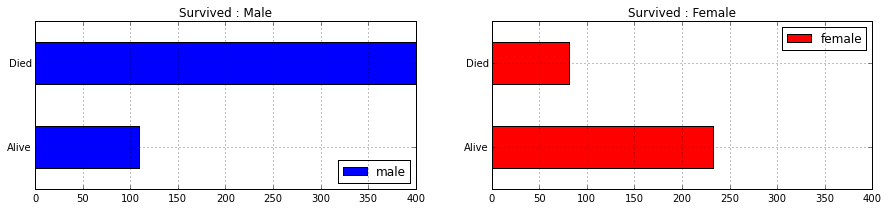

In [23]:
# 남녀 생존자수를 기반으로 분석한다
fig_sur_by_gen = plt.figure( figsize = (15,3) )    # fig size 정의

# 남자
ax_sur_by_male = plt.subplot2grid( (1,2), (0,0) )    # 표현 data의 위치
sz_survived_male_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'male' ] ).value_counts()    # 남자 생존여부 구분
sz_survived_male_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_male_summary.sort_index( ascending = True ).plot( kind = 'barh', label = 'male', xlim = ([0,400]), ax = ax_sur_by_male )
plt.title( 'Survived : Male' ); plt.legend( loc = 'best' )
print sz_survived_male_summary

# 여자
ax_sur_by_female = plt.subplot2grid( (1,2), (0,1 ) )    # 표현 data의 위치
sz_survived_female_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'female' ] ).value_counts()    # 여자 생존여부 구분
sz_survived_female_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_female_summary.sort_index( ascending = True ).plot( kind = 'barh', color = 'red', label = 'female', xlim = ([0,400]), ax = ax_sur_by_female )
plt.title( 'Survived : Female' ); plt.legend( loc = 'best' )
print sz_survived_female_summary

여자의 경우, 생존자가 많다

##성별에 따른, 생존률 분석

Male Alive % :  0.188908145581
Female Alive % :  0.742038216561


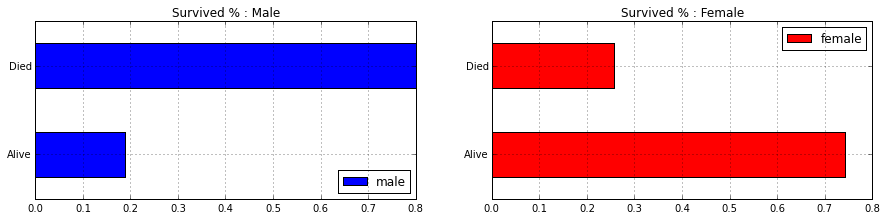

In [24]:
# 남녀 각각의 생존률을 기반으로 분석한다
fig_sur_prop_by_gen = plt.figure( figsize = (15,7) )    # fig size 정의
# 남자
ax_sur_prop_by_male = plt.subplot2grid( (2,2), (1,0) )    # 표현 data의 위치
sz_survived_male_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'male' ] ).value_counts()    # 남자 생존여부 구분
sz_survived_male_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
( sz_survived_male_summary/np.float( df_male[ 'PassengerId' ].size ) ).sort_index( ascending = True ).plot( kind = 'barh', label = 'male', xlim = ([0,0.8]), ax = ax_sur_prop_by_male )
plt.title( 'Survived % : Male' ); plt.legend( loc = 'best' )
print 'Male Alive % : ', ( sz_survived_male_summary/np.float( df_male[ 'PassengerId' ].size ) ).ix[ 'Alive' ]

# 여자
ax_sur_prop_by_female = plt.subplot2grid( (2,2), (1,1) )    # 표현 data의 위치
sz_survived_female_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'female' ] ).value_counts()    # 여자 생존여부 구분
sz_survived_female_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
( sz_survived_female_summary/np.float( df_female[ 'PassengerId' ].size ) ).sort_index( ascending = True ).plot( kind = 'barh', label = 'female', xlim = ([0,0.8]), ax = ax_sur_prop_by_female, color = 'red' )
plt.title( 'Survived % : Female' ); plt.legend( loc = 'best' )
print 'Female Alive % : ', ( sz_survived_female_summary/np.float( df_female[ 'PassengerId' ].size ) ).ix[ 'Alive' ]

* 요약하면,
* 남자들의 경우, 생존자 << 사망자
* 여자들의 경우, 생존자 >> 사망자

임을 알 수 있다.

**<font color = 'red'>즉, 성별은 생존률과 관련성이 있음을 알 수 있다. 여자는 생존가능성이 높다</font>**

##좌석등급에 따른, 생존률 분석

Alive    136
Died      80
dtype: int64
Died     97
Alive    87
dtype: int64
Died     372
Alive    119
dtype: int64


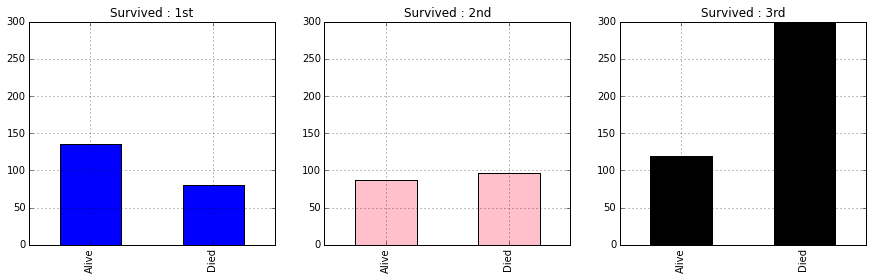

In [25]:
# 좌석등급 생존자수를 기반으로 분석한다
fig_sur_by_pclass = plt.figure( figsize = (15,4) )    # fig size 정의

# 1등급
sz_survived_pclass1_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 1 ] ).value_counts()    # 1등급 좌석 생존 요약
ax_sur_by_class1 = plt.subplot2grid( (1,3), (0,0) )    # 표현 data의 위치
sz_survived_pclass1_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_pclass1_summary.sort_index().plot( kind = 'bar', label = '1st', ylim = ([0,300]), ax = ax_sur_by_class1 )
plt.title( 'Survived : 1st' )
print sz_survived_pclass1_summary

# 2등급
sz_survived_pclass2_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 2 ] ).value_counts()    # 2등급 좌석 생존 요약
ax_sur_by_class2 = plt.subplot2grid( (1,3), (0,1) )    # 표현 data의 위치
sz_survived_pclass2_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_pclass2_summary.sort_index().plot( kind = 'bar', label = '2nd', ylim = ([0,300]), ax = ax_sur_by_class2, color = 'pink' )
plt.title( 'Survived : 2nd' )
print sz_survived_pclass2_summary

# 3등급
sz_survived_pclass3_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 3 ] ).value_counts()    # 2등급 좌석 생존 요약
ax_sur_by_class3 = plt.subplot2grid( (1,3), (0,2) )    # 표현 data의 위치
sz_survived_pclass3_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_pclass3_summary.sort_index().plot( kind = 'bar', label = '1st', ylim = ([0,300]), ax = ax_sur_by_class3, color = 'black' )
plt.title( 'Survived : 3rd' )
print sz_survived_pclass3_summary

* 1등석은 생존자 > 사망자, 2등석은 비슷하고, 3등석은 사망자 >> 생존자이다.

**<font color='red'>즉, 3등석은 사망확률이 높다</font>**

1st Alive % :  0.62962962963
2nd Alive % :  0.472826086957
3rd Alive % :  0.242362525458


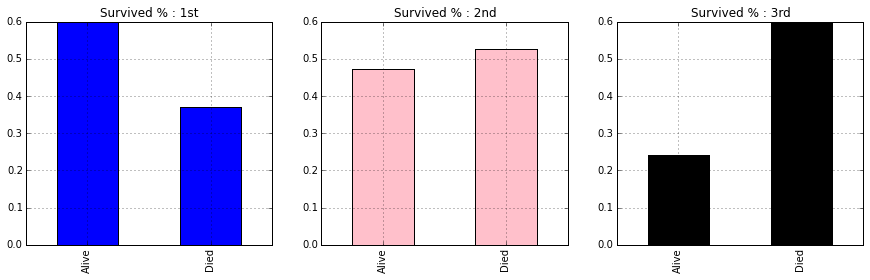

In [26]:
# 좌석등급 각각의 생존률을 기반으로 분석한다
fig_sur_prop_by_pclass = plt.figure( figsize = (15,4) )    # fig size 정의

# 1등급
sz_sur_pclass1 = df[ 'Survived' ][ df[ 'Pclass' ] == 1 ]    # 1등급 Series raw data
sz_sur_prop_pclass1_summary = sz_sur_pclass1.value_counts()/( np.float( sz_sur_pclass1.size ) ) # groupby후 %
ax_sur_prop_by_class1 = plt.subplot2grid( (1,3), (0,0) )    # 표현 data의 위치
sz_sur_prop_pclass1_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_sur_prop_pclass1_summary.sort_index().plot( kind = 'bar', label = '1st', ylim = ([0,0.6]), ax = ax_sur_prop_by_class1 )
plt.title( 'Survived % : 1st' )
print '1st Alive % : ', sz_sur_prop_pclass1_summary.ix[ 'Alive' ]

# 2등급
sz_sur_pclass2 = df[ 'Survived' ][ df[ 'Pclass' ] == 2 ]    # 2등급 Series raw data
sz_sur_prop_pclass2_summary = sz_sur_pclass2.value_counts()/( np.float( sz_sur_pclass2.size ) ) # groupby후 %
ax_sur_prop_by_class2 = plt.subplot2grid( (1,3), (0,1) )    # 표현 data의 위치
sz_sur_prop_pclass2_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_sur_prop_pclass2_summary.sort_index().plot( kind = 'bar', label = '2nd', ylim = ([0,0.6]), ax = ax_sur_prop_by_class2, color = 'pink' )
plt.title( 'Survived % : 2nd' )
print '2nd Alive % : ', sz_sur_prop_pclass2_summary.ix[ 'Alive' ]

# # 3등급
sz_sur_pclass3 = df[ 'Survived' ][ df[ 'Pclass' ] == 3 ]    # 3등급 Series raw data
sz_sur_prop_pclass3_summary = sz_sur_pclass3.value_counts()/( np.float( sz_sur_pclass3.size ) ) # groupby후 %
ax_sur_prop_by_class3 = plt.subplot2grid( (1,3), (0,2) )    # 표현 data의 위치
sz_sur_prop_pclass3_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_sur_prop_pclass3_summary.sort_index().plot( kind = 'bar', label = '3rd', ylim = ([0,0.6]), ax = ax_sur_prop_by_class3, color = 'black' )
plt.title( 'Survived % : 3rd' )
print '3rd Alive % : ', sz_sur_prop_pclass3_summary.ix[ 'Alive' ]

* 1등석은 생존자 > 사망자, 2등석은 비슷하고, 3등석은 사망자 >> 생존자이다.

**<font color='red'>즉, 3등석은 사망확률이 높다</font>**

**<font color='red'>그리고, 1등석은 생존확률이 높다</font>**

###여기까지 정리하면, 여자 w/ 1등석 >>> 남자 w/ 3등석의 형태로 생존확률은 높아질 것이다.

1st Female :  0.968085106383
1st Male :  0.368852459016
2nd Female :  0.921052631579
2nd Male :  0.157407407407
3rd Female :  0.5
3rd Male :  0.135446685879


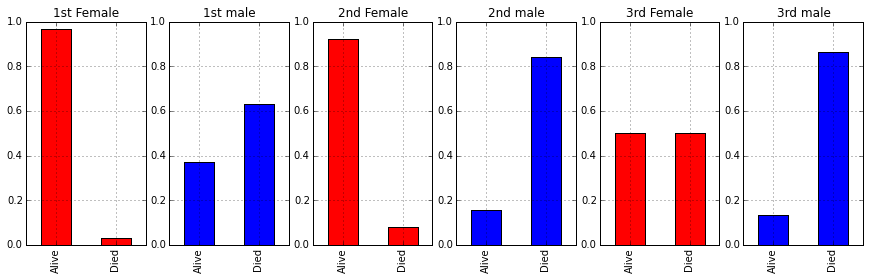

In [27]:
# 좌석등급별 성별따른 각각의 생존률을 기반으로 분석한다
fig_pclass1 = plt.figure( figsize = (15,4) )    # fig size 정의

# 1등급, 여자
sz_pclass1_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 1 ) & ( df[ 'Sex' ] == 'female' ) ]    # 1등급, 여자
sz_pclass1_f_summary = sz_pclass1_f.value_counts()/( np.float( sz_pclass1_f.size ) )    # groupby후 %
sz_pclass1_f_summary
ax_pclass1_f = plt.subplot2grid( (1,6), (0,0) )    # 표현 data의 위치
sz_pclass1_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass1_f_summary.sort_index().plot( kind = 'bar', label = '1st w/ female', ylim = ([0,1]), ax = ax_pclass1_f, color = 'red' )
plt.title( '1st Female' )
print '1st Female : ', sz_pclass1_f_summary.ix[ 'Alive' ]

# 1등급, 남자
sz_pclass1_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 1 ) & ( df[ 'Sex' ] == 'male' ) ]    # 1등급, 남자
sz_pclass1_m_summary = sz_pclass1_m.value_counts()/( np.float( sz_pclass1_m.size ) )    # groupby후 %
ax_pclass1_m = plt.subplot2grid( (1,6), (0,1) )    # 표현 data의 위치
sz_pclass1_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass1_m_summary.sort_index().plot( kind = 'bar', label = '1st w/ male', ylim = ([0,1]), ax = ax_pclass1_m )
plt.title( '1st male' )
print '1st Male : ', sz_pclass1_m_summary.ix[ 'Alive' ]

# 2등급, 여자
sz_pclass2_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 2 ) & ( df[ 'Sex' ] == 'female' ) ]    # 2등급, 여자
sz_pclass2_f_summary = sz_pclass2_f.value_counts()/( np.float( sz_pclass2_f.size ) )    # groupby후 %
sz_pclass2_f_summary
sz_pclass2_f = plt.subplot2grid( (1,6), (0,2) )    # 표현 data의 위치
sz_pclass2_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass2_f_summary.sort_index().plot( kind = 'bar', label = '2nd w/ female', ylim = ([0,1]), ax = sz_pclass2_f, color = 'red' )
plt.title( '2nd Female' )
print '2nd Female : ', sz_pclass2_f_summary.ix[ 'Alive' ]

# 2등급, 남자
sz_pclass2_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 2 ) & ( df[ 'Sex' ] == 'male' ) ]    # 2등급, 남자
sz_pclass2_m_summary = sz_pclass2_m.value_counts()/( np.float( sz_pclass2_m.size ) )    # groupby후 %
ax_pclass2_m = plt.subplot2grid( (1,6), (0,3) )    # 표현 data의 위치
sz_pclass2_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass2_m_summary.sort_index().plot( kind = 'bar', label = '2nd w/ male', ylim = ([0,1]), ax = ax_pclass2_m )
plt.title( '2nd male' )
print '2nd Male : ', sz_pclass2_m_summary.ix[ 'Alive' ]

# 3등급, 여자
sz_pclass3_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Sex' ] == 'female' ) ]    # 3등급, 여자
sz_pclass3_f_summary = sz_pclass3_f.value_counts()/( np.float( sz_pclass3_f.size ) )    # groupby후 %
sz_pclass3_f_summary
sz_pclass3_f = plt.subplot2grid( (1,6), (0,4) )    # 표현 data의 위치
sz_pclass3_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass3_f_summary.sort_index().plot( kind = 'bar', label = '3rd w/ female', ylim = ([0,1]), ax = sz_pclass3_f, color = 'red' )
plt.title( '3rd Female' )
print '3rd Female : ', sz_pclass3_f_summary.ix[ 'Alive' ]

# 3등급, 남자
sz_pclass3_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Sex' ] == 'male' ) ]    # 3등급, 남자
sz_pclass3_m_summary = sz_pclass3_m.value_counts()/( np.float( sz_pclass3_m.size ) )    # groupby후 %
ax_pclass3_m = plt.subplot2grid( (1,6), (0,5) )    # 표현 data의 위치
sz_pclass3_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass3_m_summary.sort_index().plot( kind = 'bar', label = '2nd w/ male', ylim = ([0,1]), ax = ax_pclass3_m )
plt.title( '3rd male' )
print '3rd Male : ', sz_pclass3_m_summary.ix[ 'Alive' ]

- <font color = 'blue'>정리하면, 생존률은</font>
- <font color = 'blue'>1등석 여성, 2등석 여성, 3등석 여성, 1등석 남성, 2/3등석 남성순이다.</font>

- <font color = 'red'>마찬가지로, 사망률은</font>
- <font color = 'red'>2/3등석 남성, 1등석 남성, 3등석 여성, 2등석 여성, 1등석 여성순이다.</font>

##이러한 기본적 이해를 바탕으로 Prediction 진행

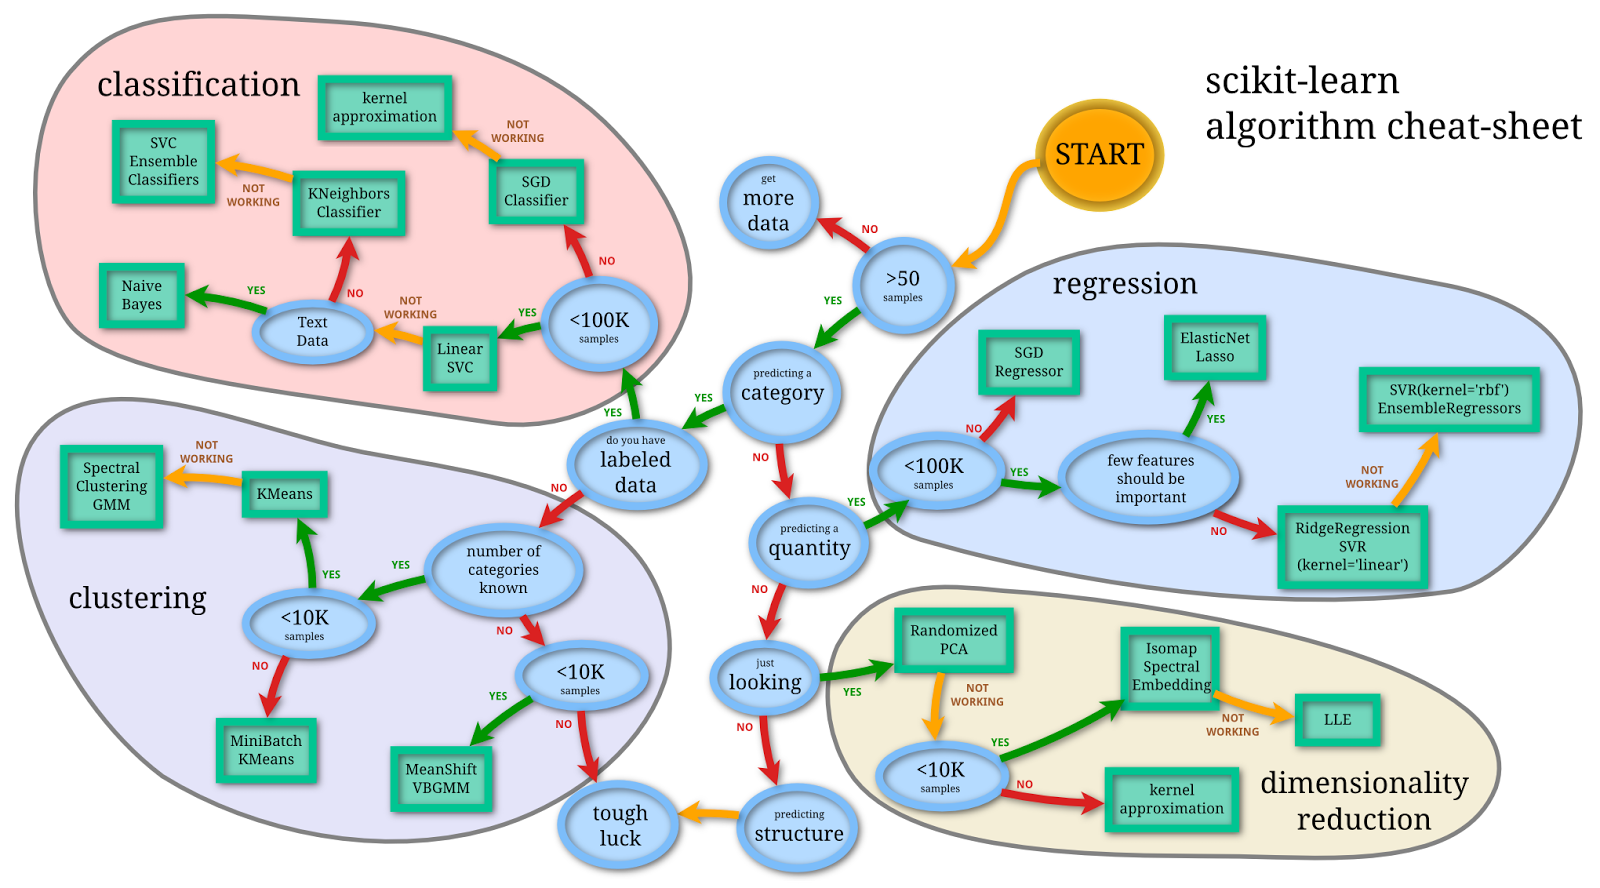

In [28]:
from IPython.display import Image
Image( filename = './images/sklearn.ml.map.png', width = 1000, height = 550 )
# Image?

- 위를 보면, 일단은 Titanic은 Classification 계열의 문제정의이며, LinearSVC로 수행가능할 것으로 보인다
- 이후, KNN 및 Ensemble 계열의 Classification (즉, RandomForest)를 적용가능하다
- PCA 진행여부도 판단할 것

##4. Train data에 대한 vectorization

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [30]:
df.shape

(891, 11)

Name feature를 Family name으로 활용해보고자 한다.

In [31]:
df[ 'Name' ] = df[ 'Name' ].str.split( ',' ).str[0]    # 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Braund,male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,Cumings,female,38,1,0,PC 17599,71.2833,C
2,3,1,3,Heikkinen,female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Futrelle,female,35,1,0,113803,53.1000,S
4,5,0,3,Allen,male,35,0,0,373450,8.0500,S


주어진 Dataset의 feature들을 보면,

1. PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare는 numeric

2. Name, Sex, Embarked, Ticket은 string

Prediction 진행을 위해서는 Name, Sex, Ticket, Embarked와 같은 categorical string을 numeric으로 변환해야 한다.

In [32]:
from sklearn import preprocessing

# Name : 이름정보 변경
le_name = preprocessing.LabelEncoder()    # Name 정보를 위한, label Encoder 생성
df[ 'Name' ] = le_name.fit_transform( df[ 'Name' ] )    # le를 fit/ transforming
# df[ 'Name' ] = le_name.inverse_transform( df[ 'Name' ] )    # 이후에, 원상태 복귀를 위한 code

# Sex : 성별정보 변경
le_sex = preprocessing.LabelEncoder()    # Sex 정보를 위한, label Encoder 생성
df[ 'Sex' ] = le_sex.fit_transform( df[ 'Sex' ] )    # le를 fit/ transforming
# df[ 'Sex' ] = le_embarked.inverse_transform( df[ 'Sex' ] )    # 이후에, 원상태 복귀를 위한 code

# Ticket : Ticket정보 변경
le_ticket = preprocessing.LabelEncoder()    # Ticket 정보를 위한, Label Encoder 생성
df[ 'Ticket' ] = le_ticket.fit_transform( df[ 'Ticket' ] )    # le를 fit/ transforming
# df[ 'Ticket' ] = le_ticket.inverse_transform( df[ 'Ticket' ] )    # 이후에, 원상태 복귀를 위한 code

# Embarked : 승선지정보 변경
le_embarked = preprocessing.LabelEncoder()    # Embarked 정보를 위한, Label Encoder 생성
df[ 'Embarked' ] = le_embarked.fit_transform( df[ 'Embarked' ] )    # le를 fit/ transforming
# df[ 'Embarked' ] = le_embarked.inverse_transform( df[ 'Embarked' ] )    # 이후에, 원상태 복귀를 위한 code

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,73,1,22,1,0,523,7.2500,2
1,2,1,1,136,0,38,1,0,596,71.2833,0
2,3,1,3,251,0,26,0,0,669,7.9250,2
3,4,1,1,198,0,35,1,0,49,53.1000,2
4,5,0,3,11,1,35,0,0,472,8.0500,2


Prediction 진행시, PassenderId, Ticket은 의미가 없으므로 제거한후, Training dataset을 확보한다
##<font color='red'>Training dataset (Vectorized)</font>

In [33]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

In [34]:
# df.drop( [ 'PassengerId', 'Ticket' ], axis = 1, inplace = True )    # PassengerId feature를 drop
df.drop( [ 'PassengerId' ], axis = 1, inplace = True )    # PassengerId feature를 drop
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,73,1,22,1,0,523,7.2500,2
1,1,1,136,0,38,1,0,596,71.2833,0
2,1,3,251,0,26,0,0,669,7.9250,2
3,1,1,198,0,35,1,0,49,53.1000,2
4,0,3,11,1,35,0,0,472,8.0500,2


- Dataframe을 Data와 Target으로 분리한다.
- Target인 y는 생존여부를 의미하는 Survived
- Data인 X는 생존여부 y를 결정하는 다양한 features인 Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

##5. Test data 확보/ Cleansing/ 누락분 처리

##Test dataset을 가지고 Cleansing후 prediction을 수행한다.
###Test dataset을 확보

In [35]:
# data를 확보한다.
# df_test = pd.read_csv( './dataset/test.csv' )    # data를 읽어들인다.
df_test.head()    # 대략적 내용을 파악한다.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


###의미없는 Feature를 제거

In [36]:
df_test.head( 1 )

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [37]:
sz_passender_id = df_test[ 'PassengerId' ]    # 답안제출 제공형식에는 PassenderId별 Survived가 제공되어야 하므로, 이를 백업

# df_test.drop( [ 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked' ], axis = 1, inplace = True )
# df_test.drop( [ 'PassengerId', 'Name', 'Ticket', 'Cabin' ], axis = 1, inplace = True )
df_test.drop( [ 'PassengerId' ], axis = 1, inplace = True )
df_test[ 'Name' ] = df_test[ 'Name' ].str.split( ',' ).str[0]

df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Kelly,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,Wilkes,female,47.0,1,0,363272,7.0000,NaN,S
2,2,Myles,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,Wirz,male,27.0,0,0,315154,8.6625,NaN,S
4,3,Hirvonen,female,22.0,1,1,3101298,12.2875,NaN,S


###Categorical data의 Label Encoding 수행

In [38]:
# Name : 이름정보 변경
le_name = preprocessing.LabelEncoder()    # Name 정보를 위한, label Encoder 생성
df_test[ 'Name' ] = le_name.fit_transform( df_test[ 'Name' ] )    # le를 fit/ transforming
# df_test[ 'Name' ] = le_name.inverse_transform( df_test[ 'Name' ] )    # 이후에, 원상태 복귀를 위한 code

# Sex : 성별정보 변경
le_sex = preprocessing.LabelEncoder()    # Sex 정보를 위한, label Encoder 생성
df_test[ 'Sex' ] = le_sex.fit_transform( df_test[ 'Sex' ] )    # le를 fit/ transforming
# df_test[ 'Sex' ] = le_sex.inverse_transform( df_test[ 'Sex' ] )    # 이후에, 원상태 복귀를 위한 code

# Ticket : Ticket정보 변경
le_ticket = preprocessing.LabelEncoder()    # Ticket 정보를 위한, label Encoder 생성
df_test[ 'Ticket' ] = le_ticket.fit_transform( df_test[ 'Ticket' ] )    # le를 fit/ transforming
# df_test[ 'Ticket' ] = le_ticket.inverse_transform( df_test[ 'Ticket' ] )    # 이후에, 원상태 복귀를 위한 code

# Embarked : 승선지정보 변경
le_embarked = preprocessing.LabelEncoder()    # Embarked 정보를 위한, Label Encoder 생성
df_test[ 'Embarked' ] = le_embarked.fit_transform( df_test[ 'Embarked' ] )    # le를 fit/ transforming
# df_test[ 'Embarked' ] = le_embarked.inverse_transform( df_test[ 'Embarked' ] )    # 이후에, 원상태 복귀를 위한 code

df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,172,1,34.5,0,0,152,7.8292,NaN,1
1,3,339,0,47.0,1,0,221,7.0000,NaN,2
2,2,231,1,62.0,0,0,73,9.6875,NaN,1
3,3,344,1,27.0,0,0,147,8.6625,NaN,2
4,3,150,0,22.0,1,1,138,12.2875,NaN,2


In [39]:
df_test.count()    # None, NaN 존재여부를 Check한다.

Pclass      418
Name        418
Sex         418
Age         332
SibSp       418
Parch       418
Ticket      418
Fare        417
Cabin        91
Embarked    418
dtype: int64

In [40]:
df_test[ df_test[ 'Fare' ].isnull() ]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,309,1,60.5,0,0,239,NaN,NaN,2


##<font color = 'red'>**누락값을 항상 채워둔다**</font>

###Fare 누락값 처리
Fare에 누락이 있으므로, 이를 처리해야 한다.

Fare는 1개 누락이므로, Fare 누락값을 처리하기 위해 Training + test data를 통해 추정.

그 전에, 우선 각 Embarked별로 Pclass와 Fare간의 상관관계를 보자.

In [41]:
# fig_survival_n_fare = plt.figure( figsize = (15,4) )    # fig size 정의

# ax_survival_n_fare = plt.subplot2grid( (1,2), (0,0) )    # 표현 data의 위치
# plt.scatter( x = df[ 'Fare' ], y = df[ 'Survived' ], alpha = alpha_val )
# plt.xlabel( 'Fare' ); plt.ylabel( 'Survived' ); plt.title( 'Fare-Survived' )

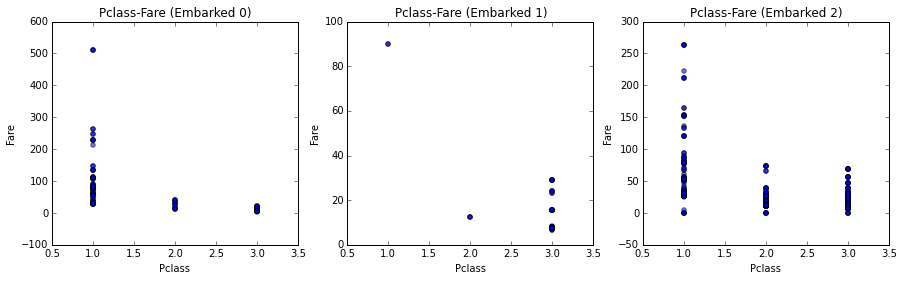

In [42]:
fig_pclass_n_fare = plt.figure( figsize = (15,4) )    # fig size 정의

sz_pclass = df[ 'Pclass' ][ df[ 'Embarked' ] == 0 ]
sz_fare = df[ 'Fare' ][ df[ 'Embarked' ] == 0 ]
ax_pclass_n_fare = plt.subplot2grid( (1,3), (0,0) )    # 표현 data의 위치
plt.scatter( x = sz_pclass, y = sz_fare, alpha = alpha_val )
plt.xlabel( 'Pclass' ); plt.ylabel( 'Fare' ); plt.title( 'Pclass-Fare (Embarked 0)' )

sz_pclass = df[ 'Pclass' ][ df[ 'Embarked' ] == 1 ]
sz_fare = df[ 'Fare' ][ df[ 'Embarked' ] == 1 ]
ax_pclass_n_fare = plt.subplot2grid( (1,3), (0,1) )    # 표현 data의 위치
plt.scatter( x = sz_pclass, y = sz_fare, alpha = alpha_val )
plt.xlabel( 'Pclass' ); plt.ylabel( 'Fare' ); plt.title( 'Pclass-Fare (Embarked 1)' )

sz_pclass = df[ 'Pclass' ][ df[ 'Embarked' ] == 2 ]
sz_fare = df[ 'Fare' ][ df[ 'Embarked' ] == 2 ]
ax_pclass_n_fare = plt.subplot2grid( (1,3), (0,2) )    # 표현 data의 위치
plt.scatter( x = sz_pclass, y = sz_fare, alpha = alpha_val )
plt.xlabel( 'Pclass' ); plt.ylabel( 'Fare' ); plt.title( 'Pclass-Fare (Embarked 2)' )
# df.head()

하여튼, 1등급이 비싸다 (자세한 계산은 Fare와 Sibsp, Parch의 sum으로 나눈후 판단해야 한다)

In [43]:
# test set내 1개 fare값을 보완하기 위한 
mean_fare_train = df[ 'Fare' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Embarked' ] == 0 ) &
                                ( df[ 'SibSp' ] == 0 ) & ( df[ 'Parch' ] == 0 ) ].mean()
mean_fare_test = df_test[ 'Fare' ][ ( df_test[ 'Pclass' ] == 3 ) & ( df_test[ 'Embarked' ] == 0 ) &
                                    ( df_test[ 'SibSp' ] == 0 ) & ( df_test[ 'Parch' ] == 0 ) ].mean()
mean_fare = (mean_fare_train + mean_fare_test)/2.0
idx = df_test[ df_test[ 'Fare' ].isnull() ].index.tolist()    # Fare == NaN인 dataset의 idx 정보
df_test.loc[ idx, 'Fare' ] = mean_fare    # 결측값 보완

In [44]:
df_test.count()

Pclass      418
Name        418
Sex         418
Age         332
SibSp       418
Parch       418
Ticket      418
Fare        418
Cabin        91
Embarked    418
dtype: int64

###Age 누락값 처리
* 1건의 Fare 누락분은 채워넣었고, Age를 처리해야 한다. 추측컨데, 좌석등급 혹은 Embarked와 관련성 있는지 확인해본다.

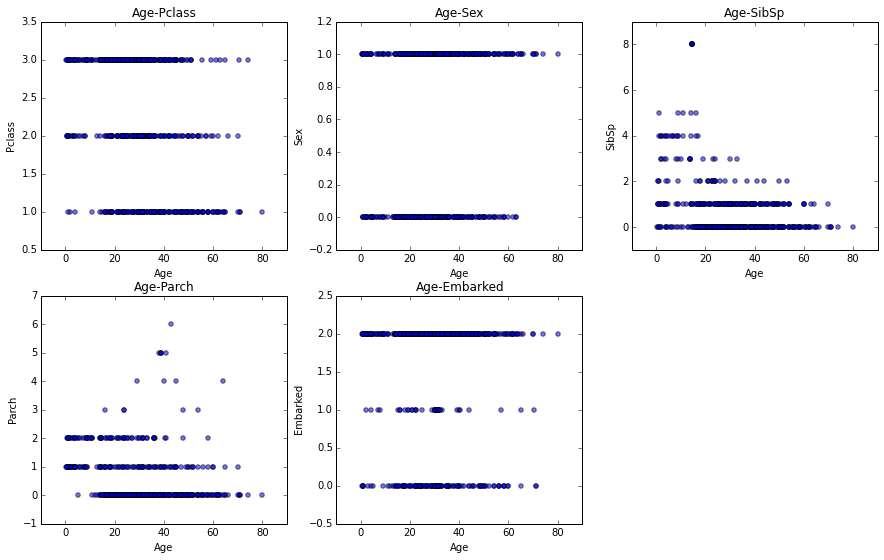

In [45]:
# df_test[ df_test[ 'Age' ].isnull() ]
fig_pclass_n_age = plt.figure( figsize = (15,9) )    # fig size 정의

ax_pclass_n_age = plt.subplot2grid( (2,3), (0,0) )    # 표현 data의 위치
plt.scatter( x = df[ 'Age' ], y = df[ 'Pclass' ], alpha = alpha_val )
plt.xlabel( 'Age' ); plt.ylabel( 'Pclass' ); plt.title( 'Age-Pclass' )

ax_pclass_n_age = plt.subplot2grid( (2,3), (0,1) )    # 표현 data의 위치
plt.scatter( x = df[ 'Age' ], y = df[ 'Sex' ], alpha = alpha_val )
plt.xlabel( 'Age' ); plt.ylabel( 'Sex' ); plt.title( 'Age-Sex' )

ax_pclass_n_age = plt.subplot2grid( (2,3), (0,2) )    # 표현 data의 위치
plt.scatter( x = df[ 'Age' ], y = df[ 'SibSp' ], alpha = alpha_val )
plt.xlabel( 'Age' ); plt.ylabel( 'SibSp' ); plt.title( 'Age-SibSp' )

ax_pclass_n_age = plt.subplot2grid( (2,3), (1,0) )    # 표현 data의 위치
plt.scatter( x = df[ 'Age' ], y = df[ 'Parch' ], alpha = alpha_val )
plt.xlabel( 'Age' ); plt.ylabel( 'Parch' ); plt.title( 'Age-Parch' )

ax_pclass_n_age = plt.subplot2grid( (2,3), (1,1) )    # 표현 data의 위치
plt.scatter( x = df[ 'Age' ], y = df[ 'Embarked' ], alpha = alpha_val )
plt.xlabel( 'Age' ); plt.ylabel( 'Embarked' ); plt.title( 'Age-Embarked' )

* 단언은 곤란하나, 연령대가 높아짐에 따라 좌석등급은 높아지는 정도가 확인된다. 하지만, 60대 3등급은 희박하고, 10대 1등급도 희박하다.
* 나이분포의 특이성은 SibSp와 관련성이 있어 보이므로, SibSp별 mean Age를 확보하여 누락 Age에 채우도록 한다.
* 하지만, 각 좌석등급별 평균나이를 채우려면 귀찮으니, 전체 평균을 누락된 Age에 채우도록 한다.

In [46]:
# df_test[ df_test[ 'Age' ].isnull() ]
# mean_age_sub0 = ( df[ 'Age' ][ df[ 'SibSp' ] == 0 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 0 ].mean() )/2.0
# mean_age_sub1 = ( df[ 'Age' ][ df[ 'SibSp' ] == 1 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 1 ].mean() )/2.0
# mean_age_sub2 = ( df[ 'Age' ][ df[ 'SibSp' ] == 2 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 2 ].mean() )/2.0
# mean_age_sub3 = ( df[ 'Age' ][ df[ 'SibSp' ] == 3 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 3 ].mean() )/2.0
# mean_age_sub4 = ( df[ 'Age' ][ df[ 'SibSp' ] == 4 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 4 ].mean() )/2.0
# mean_age_sub5 = ( df[ 'Age' ][ df[ 'SibSp' ] == 5 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 5 ].mean() )/2.0
# mean_age_sub8 = df_test[ 'Age' ][ df_test[ 'SibSp' ] == 8 ].mean()

# mean_age_sub0, mean_age_sub1, mean_age_sub2, mean_age_sub3, mean_age_sub4, mean_age_sub5, mean_age_sub8    # SibSp별 평균Age
# print df_test.count()

In [47]:
print df_test.count()

idx_list = df_test[ ( df_test[ 'Age' ].isnull() ) & ( df_test[ 'SibSp' ] == 0 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df_test.loc[ idx, 'Age' ] = mean_age_sub0

idx_list = df_test[ ( df_test[ 'Age' ].isnull() ) & ( df_test[ 'SibSp' ] == 1 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df_test.loc[ idx, 'Age' ] = mean_age_sub1
    
idx_list = df_test[ ( df_test[ 'Age' ].isnull() ) & ( df_test[ 'SibSp' ] == 2 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df_test.loc[ idx, 'Age' ] = mean_age_sub2
    
idx_list = df_test[ ( df_test[ 'Age' ].isnull() ) & ( df_test[ 'SibSp' ] == 3 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df_test.loc[ idx, 'Age' ] = mean_age_sub3
    
idx_list = df_test[ ( df_test[ 'Age' ].isnull() ) & ( df_test[ 'SibSp' ] == 4 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df_test.loc[ idx, 'Age' ] = mean_age_sub4
    
idx_list = df_test[ ( df_test[ 'Age' ].isnull() ) & ( df_test[ 'SibSp' ] == 5 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df_test.loc[ idx, 'Age' ] = mean_age_sub5

idx_list = df_test[ ( df_test[ 'Age' ].isnull() ) & ( df_test[ 'SibSp' ] == 8 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df_test.loc[ idx, 'Age' ] = mean_age_sub8
    
print df_test.count()
df_test[ df_test[ 'Age' ].isnull() ]

Pclass      418
Name        418
Sex         418
Age         332
SibSp       418
Parch       418
Ticket      418
Fare        418
Cabin        91
Embarked    418
dtype: int64
Pclass      418
Name        418
Sex         418
Age         418
SibSp       418
Parch       418
Ticket      418
Fare        418
Cabin        91
Embarked    418
dtype: int64


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Train, Test data의 SibSp, Parch가 존재하는 경우, SibSp를 가족승객 여부로 활용한다

In [48]:
print df.count()
idx_list = df[ df[ 'SibSp' ] > 0 ].index.tolist()

for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'SibSp' ] = 1    # 가족승객이라는 의미로 활용
    
idx_list = df[ df[ 'Parch' ] > 0 ].index.tolist()

for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Parch' ] = 1    # 가족승객이라는 의미로 활용    
    
    
idx_list = df_test[ df_test[ 'SibSp' ] > 0 ].index.tolist()

for idx in idx_list :    # row에 대한 강제 setting
    df_test.loc[ idx, 'SibSp' ] = 1    # 가족승객이라는 의미로 활용   
    
idx_list = df_test[ df_test[ 'Parch' ] > 0 ].index.tolist()

for idx in idx_list :    # row에 대한 강제 setting
    df_test.loc[ idx, 'Parch' ] = 1    # 가족승객이라는 의미로 활용       

    
idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 1 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub1
    
idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 2 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub2
    
idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 3 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub3
    
idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 4 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub4
    
idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 5 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub5

idx_list = df[ ( df[ 'Age' ].isnull() ) & ( df[ 'SibSp' ] == 8 ) ].index.tolist()
for idx in idx_list :    # row에 대한 강제 setting
    df.loc[ idx, 'Age' ] = mean_age_sub8
    
# print df.count()
# df[ df[ 'Age' ].isnull() ]

Survived    891
Pclass      891
Name        891
Sex         891
Age         891
SibSp       891
Parch       891
Ticket      891
Fare        891
Embarked    891
dtype: int64


###<font color='blue'>Test dataset에 대한 누락분은 모두 해결했다</font>

###Training dataset과 실제 dataset의 구조가 동일한지 확인하는 validation code

In [49]:
# print df[ 'Survived' ].describe()
# print df[ 'Pclass' ].describe()
# print df[ 'Sex' ].describe()
# print df[ 'Age' ].describe()
# print df[ 'SibSp' ].describe()
# print df[ 'Parch' ].describe()
# print df[ 'Fare' ].describe()
# print df[ 'Embarked' ].describe()
# print '======================'
# # print df_test[ 'Survived' ].describe()
# print df_test[ 'Pclass' ].describe()
# print df_test[ 'Sex' ].describe()
# print df_test[ 'Age' ].describe()
# print df_test[ 'SibSp' ].describe()
# print df_test[ 'Parch' ].describe()
# print df_test[ 'Fare' ].describe()
# print df_test[ 'Embarked' ].describe()

##6. Predict modeling

###Training dataset을 X와 y로 분리

In [50]:
print df.head( 1 )
print df_test.head( 1 )
df.head( 1 )

   Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Embarked
0         0       3    73    1   22      1      0     523  7.25         2
   Pclass  Name  Sex   Age  SibSp  Parch  Ticket    Fare Cabin  Embarked
0       3   172    1  34.5      0      0     152  7.8292   NaN         1


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,73,1,22,1,0,523,7.25,2


##<font color='red'>Training시 사용할 Feature 선별의 Case들</font>

In [51]:
# list_for_drop = [ 'Name', 'Ticket', 'Fare', 'Age', 'SibSp', 'Parch', 'Embarked' ]    # training, test 모두에게서 drop features
# list_for_drop = [ 'Name', 'Fare', 'Age', 'SibSp', 'Parch', 'Embarked' ]    # training, test 모두에게서 drop features
list_for_drop = [
#                   'Name',
#                   'Ticket',
#                   'Fare',
#                   'Age',
                  'SibSp',
                  'Parch',
#                   'Embarked'
                ]    # training, test 모두에게서 drop features
list_for_train = list( list_for_drop )
list_for_test = list( list_for_drop )

list_for_train.append( 'Survived' )
list_for_test.append( 'Cabin' )

X = df.drop( list_for_train, axis = 1 )    # X를 확보
y = df[ 'Survived' ]    # y를 확보

cv_cnt = 30

In [52]:
X.head( 3 )

,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,3,73,1,22,523,7.2500,2
1,1,136,0,38,596,71.2833,0
2,3,251,0,26,669,7.9250,2


##0. Decision Tree 수행

In [53]:
# %%time
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import grid_search

# Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, random_state = 0 )    # dataset의 분리

params = { 'criterion' : ('gini','entropy'), 'splitter' : ('best', 'random'), 'max_depth' : (3,4,5,6,7,10,20,40),
           'min_samples_split' : (2,4,8), 'class_weight' : ('auto',None), 'random_state' : (1,4) }
gs = grid_search.GridSearchCV( DecisionTreeClassifier(), param_grid = params, cv = cv_cnt )    # GridSearch 생성
gs.fit( X, y )    # fitting

print gs.best_score_
# gs.grid_scores_

0.820426487093


In [54]:
# plt.imshow( metrics.confusion_matrix( ypred, ytest ), interpolation = 'nearest', cmap = plt.cm.binary )
# plt.grid( False )
# plt.colorbar()
# plt.xlabel( "predicted label" )
# plt.ylabel( "true label" );

In [55]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier( max_depth = 10, max_features = 3, n_estimators = 100  )
# clf.fit( Xtrain, ytrain )
# ypred = clf.predict( Xtest )
# metrics.accuracy_score( ypred, ytest )

In [56]:
# from sklearn.svm import SVC # "Support Vector Classifier"

# clf = SVC( kernel = 'linear' )
# clf.fit( Xtrain, ytrain )
# ypred = clf.predict( Xtest )
# metrics.accuracy_score( ypred, ytest )

###1. LinearSVC 수행 : 기본

In [57]:
from sklearn import svm
from sklearn import cross_validation
# from sklearn import grid_search

# gs = svm.LinearSVC()    # LinearSVC estimator를 instantiate
# k_fold = cross_validation.KFold( n = len( X ), n_folds = 10 )    # K-Folds cross validator를 생성한다.
# gs.fit( X, y )

# print cross_validation.cross_val_score( clf, X, y, cv = k_fold, n_jobs = 1 )    # default Linear SVC의 score

###2. LinearSVC 수행 : 최적 C값 적용 : cross-validation 활용

In [58]:
# LinearSVC의 Penalty params C 범위선언, 작으면 많은 관측값 기반, 크면 plane근방 관측값 기반
# params = { 'C' : (0.1, 0.5, 1.0), 'loss' : ('hinge','squared_hinge'), 'penalty' : ('I1','I2'), 'dual' : (True, False) }
params = { 'C' : (0.1, 0.5, 1.0, 1.5, 2.0) }

gs = grid_search.GridSearchCV( svm.LinearSVC(), param_grid = params, cv = cv_cnt )    # GridSearch 생성
gs.fit( X, y )    # fitting

print gs.best_score_
# gs.grid_scores_

0.630751964085


###3. KNN 수행 : 최적 neighbor수, weight값 활용

In [59]:
from sklearn.neighbors import KNeighborsClassifier

params = { 'n_neighbors' : (1, 3, 5, 7, 10), 'weights' : ('uniform', 'distance') }

gs = grid_search.GridSearchCV( KNeighborsClassifier(), param_grid = params, cv = cv_cnt )    # GridSearch 생성
gs.fit( X, y )    # fitting

print gs.best_score_
# gs.grid_scores_

0.668911335578


###4. Ensemble 수행 : RandomForestClassifier

In [ ]:
# 0.841750841751 확보 parameter set grid
from sklearn.ensemble import RandomForestClassifier
# , 'class_weight' : ('auto','subsample')
# params = { 'n_estimators' : (5, 10, 15, 20), 'criterion' : ('gini','entropy'), 'max_depth' : (3,5,None), 'bootstrap' : (True, False), 'class_weight' : ('auto','subsample') }
# params = { 'n_estimators' : (10, 15, 20, 25), 'criterion' : ('gini','entropy'), 'max_depth' : (3,5,None), 'bootstrap' : (True, False) }
params = { 'n_estimators' : (5,10,15),
#            'max_features' : ('auto','sqrt',None),
           'criterion' : ('gini','entropy'),
#            'max_depth' : (3,5,None),
           'min_weight_fraction_leaf' : (0.0,.3,.5),
#            'bootstrap' : (True, False)
           'class_weight' : ('auto','subsample')
         }

gs = grid_search.GridSearchCV( RandomForestClassifier( n_estimators = 100, class_weight = 'auto' ),
                               param_grid = params, cv = cv_cnt )    # GridSearch 생성
gs.fit( X, y )    # fitting

print gs.best_score_
# gs.grid_scores_

0.83950617284


In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = { 
           'n_estimators' : (15,20),
           'criterion' : ('gini','entropy'),
#            'max_features' : ('auto','sqrt',None),
           'max_depth' : (3,5,9,11,None),
#            'min_samples_split' : (3,5,7),
#            'min_samples_leaf' : (1,3,5),
           'min_weight_fraction_leaf' : (0.0,.3,.5),
#            'bootstrap' : (True, False)
#            'random_state' : (1,2,3,4),
#            'warm_start' : (True,False),
           'class_weight' : ('auto','subsample')
         }

gs = grid_search.GridSearchCV( RandomForestClassifier(),
                               param_grid = params, cv = cv_cnt )    # GridSearch 생성
gs.fit( X, y )    # fitting

print gs.best_score_
# gs.grid_scores_

###5. LogisticRegression 수행

In [ ]:
# from sklearn.linear_model import LogisticRegression

# params = { 'C' : (.1,.3,.5,.7,1.0) }
# gs = grid_search.GridSearchCV( LogisticRegression(), param_grid = params, cv = cv_cnt )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print gs.best_score_
# # gs.grid_scores_

##6. AdaBoostClassifier 수행

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

# params = { 'n_estimators' : (10,30,50,100) }
# gs = grid_search.GridSearchCV( AdaBoostClassifier(), param_grid = params, cv = cv_cnt )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print gs.best_score_
# # gs.grid_scores_

##7. BaggingClassifier 수행

In [ ]:
# from sklearn.ensemble import BaggingClassifier

# params = { 'n_estimators' : (1,3,5,10,20,30,500), 'max_samples' : (20,30,40) }
# gs = grid_search.GridSearchCV( BaggingClassifier(), param_grid = params, cv = cv_cnt )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print gs.best_score_
# # gs.grid_scores_
# # gs

###6. 실제 prediction을 수행한다.

In [ ]:
# X.head(1)

In [ ]:
# df_test.head( 3 )

In [ ]:
# df_test.drop( [ 'SibSp', 'Parch', 'Embarked' ], axis = 1, inplace = True )
# df_test.drop( [ 'SibSp', 'Parch', 'Age' ], axis = 1, inplace = True )
df_test.drop( list_for_test, axis = 1, inplace = True )

In [ ]:
df_test.head(1)

In [ ]:
df_test.head( 1 )
gs.best_estimator_

In [ ]:
# y_pred = gs.predict( df_test )    # decisionTreeClassifier인 경우 prediction 수행
y_pred = gs.best_estimator_.predict( df_test )    # prediction 수행

df_result = pd.DataFrame( sz_passender_id, columns = [ 'PassengerId' ] )    # 결과를 새로운 dataframe에 담는다
df_result[ 'Survived' ] = y_pred
df_result.to_csv( path_or_buf = 'result.csv', sep = ',', index = False )

In [ ]:
# df = pd.read_csv( './dataset/test.csv' )    # data를 읽어들인다.
# df[ 'Survived' ] = y_pred
# df.to_csv( path_or_buf = 'check.csv', sep = ',', index = False )
# # df_check.head()    # 대략적 내용을 파악한다.

##<font color='red'>7. prediction 결과를 분석한다 : 과연 training data와 유사한 결과를 보이는지</font>

###이제, 각 Feature 측면을 확인해본다.

In [ ]:
# fig_survived_summary = plt.figure( figsize = (15,4) )    # fig size 정의

# # Surveved의 기본확인
# sz_survived_summary = df[ 'Survived' ].value_counts()    # Survived의 생존여부별로 groupby하여 결과수치를 확인한다.
# sz_survived_summary_tweaked = sz_survived_summary.rename( index = { 0 : 'Die', 1 : 'Alive' } )    # index를 가시적으로 변경
# ax_survived_summary = plt.subplot2grid( (1,5), (0,0) )    # 표현 data의 위치
# sz_survived_summary_tweaked.plot( kind = 'bar', ax = ax_survived_summary, alpha = alpha_val )
# plt.xlabel( 'Survived' ); plt.ylabel( 'Count' ); plt.title( 'Survived Count' )
# print 'Survived Alive : ', sz_survived_summary.ix[ 1 ], 'Died : ', sz_survived_summary.ix[ 0 ], 'Alive % : ', np.float( sz_survived_summary.ix[1] )/np.float( sz_survived_summary.sum() )

# # P Class의 기본확인
# sz_pclass_summary = df[ 'Pclass' ].value_counts()    # Pclass를 groupby하여 결과수치를 확인한다.
# sz_pclass_summary.rename( index = { 1 : '1st', 2 : '2nd', 3 : '3rd' }, inplace = True )
# ax_pclass_summary = plt.subplot2grid( (1,5), (0,1) )    # 표현 data의 위치
# sz_pclass_summary.sort_index( ascending = True ).plot( kind = 'bar', ax = ax_pclass_summary, alpha = alpha_val )
# plt.xlabel( 'Ticket Class' ); plt.ylabel( 'Count' ); plt.title( 'Ticket Class Count' )
# print 'Class 1st : ', sz_pclass_summary.ix[ '1st' ], '2nd : ', sz_pclass_summary.ix[ '2nd' ], '3rd : ', sz_pclass_summary.ix[ '3rd' ]

# # Embarked의 기본확인
# sz_embarked_summary = df[ 'Embarked' ].value_counts()    # Embarked 정보별로 groupby하여 결과수치를 확인한다.
# sz_embarked_summary.rename( index = { 'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton' }, inplace = True )
# ax_embarked_summary = plt.subplot2grid( (1,5), (0,2) )    # 표현 data의 위치
# sz_embarked_summary.plot( kind = 'bar', ax = ax_embarked_summary, alpha = alpha_val )
# plt.xlabel( 'Embarked' ); plt.ylabel( 'Count' ); plt.title( 'Embarked Count' )
# print 'Embarked Cherbourg : ', sz_embarked_summary.ix[ 'Cherbourg' ], 'Queenstown : ', sz_embarked_summary.ix[ 'Queenstown' ], 'Southampton : ', sz_embarked_summary.ix[ 'Southampton' ]

# # Gender의 기본확인
# sz_gender_summary = df[ 'Sex' ].value_counts()    # Sex 성별별로 groupby하여 결과수치를 확인한다.
# ax_gender_summary = plt.subplot2grid( (1,5), (0,3) )    # 표현 data의 위치
# sz_gender_summary.plot( kind = 'bar', ax = ax_gender_summary, alpha = alpha_val )
# plt.xlabel( 'Sex' ); plt.ylabel( 'Count' ); plt.title( 'Sex Count' )
# print 'Sex male : ', sz_gender_summary.ix[ 'male' ], 'female : ', sz_gender_summary.ix[ 'female' ]

# # 연령대의 기본확인
# sz_survived = df[ 'Survived' ]
# sz_survived_tweaked = sz_survived.replace( to_replace = { 0 : 'Die', 1 : 'Alive' } )
# sz_age = df[ 'Age' ]
# ax_survived_summary = plt.subplot2grid( (1,5), (0,4) )    # 표현 data의 위치
# plt.scatter( x = sz_survived, y = sz_age, alpha = alpha_val )
# plt.xlabel( 'Survived, 0 : Die, 1 : Alive' ); plt.ylabel( 'Age' ); plt.title( 'Age by Survived' )

##성별에 따른, 생존자수 분석

In [ ]:
# # 남녀 각각의 생존률을 기반으로 분석한다
# fig_sur_prop_by_gen = plt.figure( figsize = (15,7) )    # fig size 정의
# # 남자
# ax_sur_prop_by_male = plt.subplot2grid( (2,2), (1,0) )    # 표현 data의 위치
# sz_survived_male_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'male' ] ).value_counts()    # 남자 생존여부 구분
# sz_survived_male_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# ( sz_survived_male_summary/np.float( df_male[ 'PassengerId' ].size ) ).sort_index( ascending = True ).plot( kind = 'barh', label = 'male', xlim = ([0,0.8]), ax = ax_sur_prop_by_male )
# plt.title( 'Survived % : Male' ); plt.legend( loc = 'best' )
# print 'Male Alive % : ', ( sz_survived_male_summary/np.float( df_male[ 'PassengerId' ].size ) ).ix[ 'Alive' ]

# # 여자
# ax_sur_prop_by_female = plt.subplot2grid( (2,2), (1,1) )    # 표현 data의 위치
# sz_survived_female_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'female' ] ).value_counts()    # 여자 생존여부 구분
# sz_survived_female_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# ( sz_survived_female_summary/np.float( df_female[ 'PassengerId' ].size ) ).sort_index( ascending = True ).plot( kind = 'barh', label = 'female', xlim = ([0,0.8]), ax = ax_sur_prop_by_female, color = 'red' )
# plt.title( 'Survived % : Female' ); plt.legend( loc = 'best' )
# print 'Female Alive % : ', ( sz_survived_female_summary/np.float( df_female[ 'PassengerId' ].size ) ).ix[ 'Alive' ]

##좌석등급에 따른, 생존률 분석

In [ ]:
# # 좌석등급 생존자수를 기반으로 분석한다
# fig_sur_by_pclass = plt.figure( figsize = (15,4) )    # fig size 정의

# # 1등급
# sz_survived_pclass1_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 1 ] ).value_counts()    # 1등급 좌석 생존 요약
# ax_sur_by_class1 = plt.subplot2grid( (1,3), (0,0) )    # 표현 data의 위치
# sz_survived_pclass1_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_survived_pclass1_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st', ylim = ([0,300]), ax = ax_sur_by_class1 )
# plt.title( 'Survived : 1st' )
# print sz_survived_pclass1_summary

# # 2등급
# sz_survived_pclass2_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 2 ] ).value_counts()    # 2등급 좌석 생존 요약
# ax_sur_by_class2 = plt.subplot2grid( (1,3), (0,1) )    # 표현 data의 위치
# sz_survived_pclass2_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_survived_pclass2_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd', ylim = ([0,300]), ax = ax_sur_by_class2, color = 'pink' )
# plt.title( 'Survived : 2nd' )
# print sz_survived_pclass2_summary

# # 3등급http://localhost:8888/notebooks/15.06.08.01.kaggle.titanic/15.06.12.01.kaggle.Machine%20Learning%20from%20Disaster.ipynb#
# sz_survived_pclass3_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 3 ] ).value_counts()    # 2등급 좌석 생존 요약
# ax_sur_by_class3 = plt.subplot2grid( (1,3), (0,2) )    # 표현 data의 위치
# sz_survived_pclass3_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_survived_pclass3_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st', ylim = ([0,300]), ax = ax_sur_by_class3, color = 'black' )
# plt.title( 'Survived : 3rd' )
# print sz_survived_pclass3_summary

##좌석등급/ 성별구분 분석

In [ ]:
# # 좌석등급별 성별따른 각각의 생존률을 기반으로 분석한다
# fig_pclass1 = plt.figure( figsize = (15,4) )    # fig size 정의

# # 1등급, 여자
# sz_pclass1_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 1 ) & ( df[ 'Sex' ] == 'female' ) ]    # 1등급, 여자
# sz_pclass1_f_summary = sz_pclass1_f.value_counts()/( np.float( sz_pclass1_f.size ) )    # groupby후 %
# sz_pclass1_f_summary
# ax_pclass1_f = plt.subplot2grid( (1,6), (0,0) )    # 표현 data의 위치
# sz_pclass1_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass1_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st w/ female', ylim = ([0,1]), ax = ax_pclass1_f, color = 'red' )
# plt.title( '1st Female' )
# try :
#     print '1st Female : ', sz_pclass1_f_summary.ix[ 'Alive' ]
# except :
#     print '0'

# # 1등급, 남자
# sz_pclass1_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 1 ) & ( df[ 'Sex' ] == 'male' ) ]    # 1등급, 남자
# sz_pclass1_m_summary = sz_pclass1_m.value_counts()/( np.float( sz_pclass1_m.size ) )    # groupby후 %
# ax_pclass1_m = plt.subplot2grid( (1,6), (0,1) )    # 표현 data의 위치
# sz_pclass1_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass1_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st w/ male', ylim = ([0,1]), ax = ax_pclass1_m )
# plt.title( '1st male' )
# sz_pclass1_m_summary
# try :
#     print '1st Male : ', sz_pclass1_m_summary.ix[ 'Alive' ]
# except :
#     print '0'

# # 2등급, 여자
# sz_pclass2_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 2 ) & ( df[ 'Sex' ] == 'female' ) ]    # 2등급, 여자
# sz_pclass2_f_summary = sz_pclass2_f.value_counts()/( np.float( sz_pclass2_f.size ) )    # groupby후 %
# sz_pclass2_f_summary
# sz_pclass2_f = plt.subplot2grid( (1,6), (0,2) )    # 표현 data의 위치
# sz_pclass2_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass2_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ female', ylim = ([0,1]), ax = sz_pclass2_f, color = 'red' )
# plt.title( '2nd Female' )
# try :
#     print '2nd Female : ', sz_pclass2_f_summary.ix[ 'Alive' ]
# except :
#     print '0'

# # 2등급, 남자
# sz_pclass2_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 2 ) & ( df[ 'Sex' ] == 'male' ) ]    # 2등급, 남자
# sz_pclass2_m_summary = sz_pclass2_m.value_counts()/( np.float( sz_pclass2_m.size ) )    # groupby후 %
# ax_pclass2_m = plt.subplot2grid( (1,6), (0,3) )    # 표현 data의 위치
# sz_pclass2_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass2_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ male', ylim = ([0,1]), ax = ax_pclass2_m )
# plt.title( '2nd male' )
# try :
#     print '2nd Male : ', sz_pclass2_m_summary.ix[ 'Alive' ]
# except :
#     print '0'

# # 3등급, 여자
# sz_pclass3_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Sex' ] == 'female' ) ]    # 3등급, 여자
# sz_pclass3_f_summary = sz_pclass3_f.value_counts()/( np.float( sz_pclass3_f.size ) )    # groupby후 %
# sz_pclass3_f_summary
# sz_pclass3_f = plt.subplot2grid( (1,6), (0,4) )    # 표현 data의 위치
# sz_pclass3_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass3_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '3rd w/ female', ylim = ([0,1]), ax = sz_pclass3_f, color = 'red' )
# plt.title( '3rd Female' )
# try :
#     print '3rd Female : ', sz_pclass3_f_summary.ix[ 'Alive' ]
# except :
#     print '0'

# # 3등급, 남자
# sz_pclass3_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Sex' ] == 'male' ) ]    # 3등급, 남자
# sz_pclass3_m_summary = sz_pclass3_m.value_counts()/( np.float( sz_pclass3_m.size ) )    # groupby후 %
# ax_pclass3_m = plt.subplot2grid( (1,6), (0,5) )    # 표현 data의 위치
# sz_pclass3_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass3_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ male', ylim = ([0,1]), ax = ax_pclass3_m )
# plt.title( '3rd male' )
# try :
#     print '3rd Male : ', sz_pclass3_m_summary.ix[ 'Alive' ]
# except :
#     print '0'